In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("gas_turbines.csv")


In [3]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [4]:
# Split the data into features (X) and target (y)
X = df.drop("TEY", axis=1)
y = df["TEY"]

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict TEY using the test data
y_pred = model.predict(X_test)

In [8]:
# Evaluate the model using metrics such as mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [9]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.52293328786426
R^2 Score: 0.9979562035632741


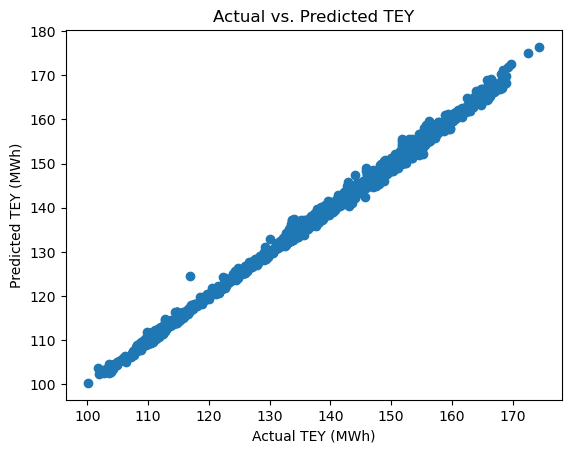

In [10]:
# Plot a scatter plot of the actual vs. predicted TEY
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual TEY (MWh)")
plt.ylabel("Predicted TEY (MWh)")
plt.title("Actual vs. Predicted TEY")
plt.show()

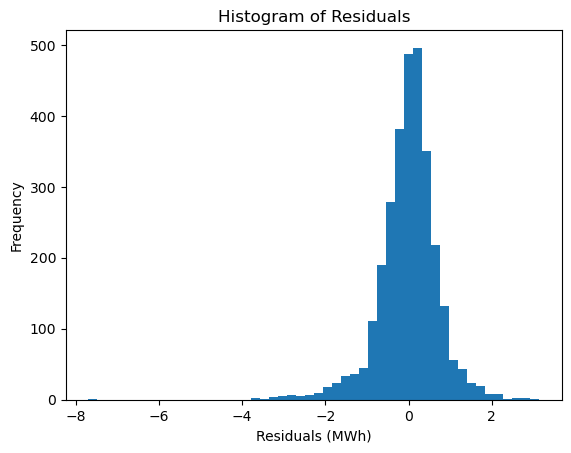

In [11]:

# Plot a histogram of the residuals (difference between actual and predicted TEY)
residuals = y_test - y_pred
plt.hist(residuals, bins=50)
plt.xlabel("Residuals (MWh)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Regression neural network model.

In [13]:
# Define the model architecture
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
    ])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
376/376 [==============================] - 3s 5ms/step - loss: 168.2742 - mae: 9.6562 - val_loss: 96.7384 - val_mae: 8.1433
Epoch 2/100
376/376 [==============================] - 2s 4ms/step - loss: 43.5401 - mae: 5.0611 - val_loss: 16.3101 - val_mae: 3.1686
Epoch 3/100
376/376 [==============================] - 2s 4ms/step - loss: 10.3025 - mae: 2.4131 - val_loss: 5.2796 - val_mae: 1.7052
Epoch 4/100
376/376 [==============================] - 1s 4ms/step - loss: 4.9339 - mae: 1.6429 - val_loss: 2.8336 - val_mae: 1.2527
Epoch 5/100
376/376 [==============================] - 1s 3ms/step - loss: 3.2304 - mae: 1.3626 - val_loss: 2.3078 - val_mae: 1.1538
Epoch 6/100
376/376 [==============================] - 1s 3ms/step - loss: 2.2503 - mae: 1.1632 - val_loss: 1.7259 - val_mae: 1.0292
Epoch 7/100
376/376 [==============================] - 1s 3ms/step - loss: 2.2393 - mae: 1.1841 - val_loss: 3.2138 - val_mae: 1.5208
Epoch 8/100
376/376 [==============================] - 1s 3ms/s